In [2]:
import os

os.chdir("..")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

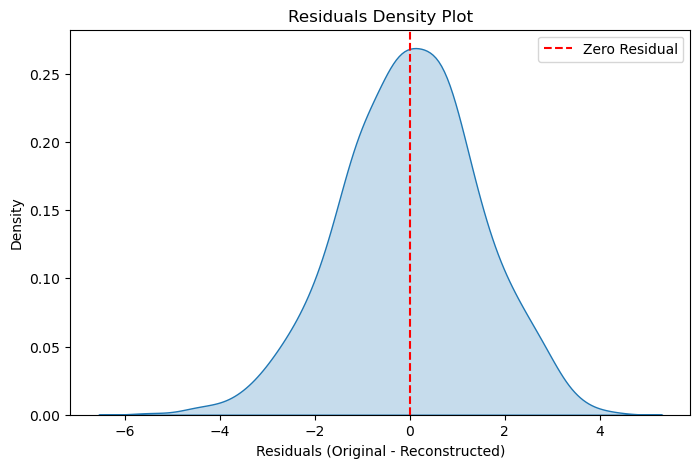

In [3]:

# Generate example data
original_data = np.random.normal(0, 1, 1000)
reconstructed_data = np.random.normal(0, 1, 1000)

# Compute residuals
residuals = original_data - reconstructed_data

plt.figure(figsize=(8, 5))
sns.kdeplot(residuals, fill=True)
plt.axvline(0, color='red', linestyle='dashed', label="Zero Residual")
plt.title("Residuals Density Plot")
plt.xlabel("Residuals (Original - Reconstructed)")
plt.legend()
plt.show()

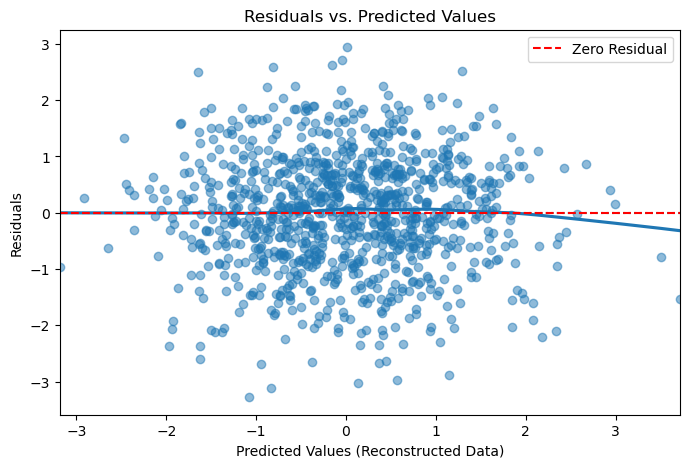

In [4]:

# Seaborn residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=reconstructed_data, y=residuals, lowess=True, scatter_kws={"alpha": 0.5})
plt.axhline(0, color='red', linestyle='dashed', label="Zero Residual")
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values (Reconstructed Data)")
plt.ylabel("Residuals")
plt.legend()
plt.show()